# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [170]:
import numpy as np

#test
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from scipy import optimize 
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from types import SimpleNamespace
# Import your own code
from  inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**--**
We set up the possible allocoations of X1A and x2a, these can be from 0 to 1.

**--**
We then set up two empty arrays for posible x1 and x2 paretooptimal allocations.

**--**
Lastly we loop trhough all possible allocations of X1A and x2A, if the allocation creates at least the same utility for both A and B we then add that allocation to our 
paretooptimal allocations


In [163]:
N = 75
w1A = 0.8
w2A = 0.3


x1A = np.linspace(0,1,N+1)
x2A = np.linspace(0,1,N+1)

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)


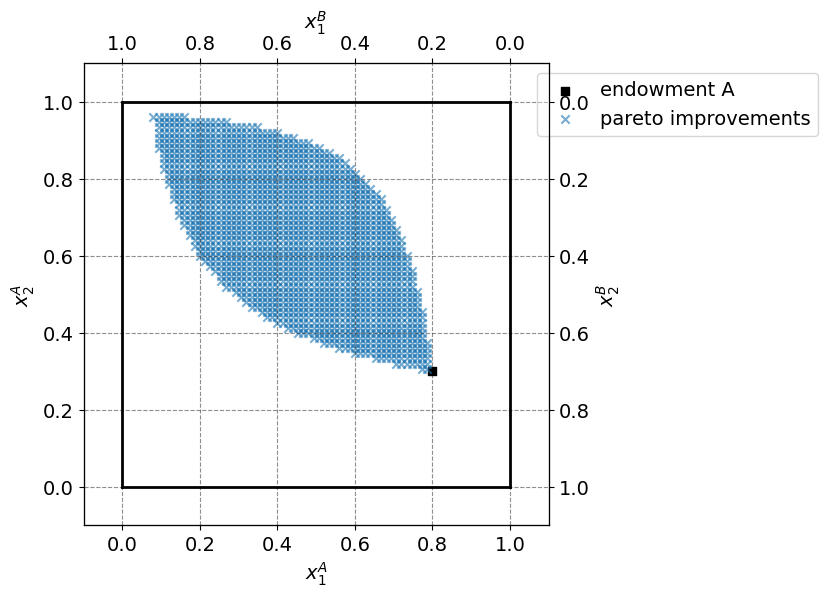

In [164]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment A')
ax_A.scatter(x1possible,x2possible, marker='x',alpha=0.6, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));



# Question 2

Explain your code and procedure

In [111]:

p1 = []

for x in range(N+1):
    new = 0.5+2*x/N
    p1.append(new)

print(p1[74:76])
# code

[2.4733333333333336, 2.5]


[(0.533333333333333, -0.2666666666666666)]


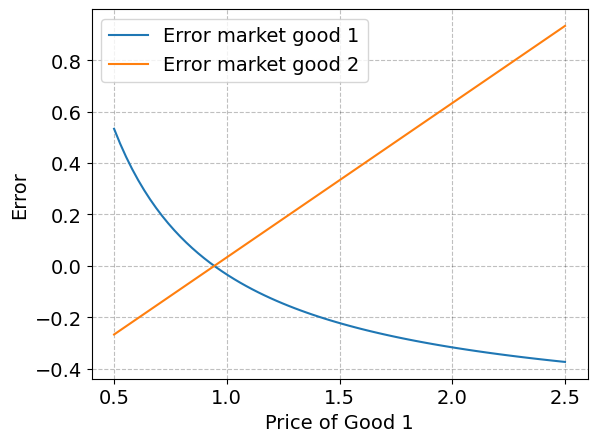

In [132]:

error = []

for x in p1:
    append_e = model.check_market_clearing(x)
    error.append(append_e)

print(error[0:1])



errors_1 = [e[0] for e in error]
errors_2 = [e[1] for e in error]



plt.plot(p1, errors_1, label='Error market good 1')
plt.plot(p1, errors_2, label='Error market good 2')
plt.xlabel('Price of Good 1')
plt.ylabel('Error')
plt.legend()
plt.show()



# Question 3

Explain your code and procedure

In [131]:
P1_guess = 2

model.market_clearing_price(P1_guess)



  0: p1 =   1.52500000 -> excess demand ->    -0.31666667
  1: p1 =   1.18237705 -> excess demand ->    -0.22841530
  2: p1 =   1.00126786 -> excess demand ->    -0.12073946
  3: p1 =   0.95019154 -> excess demand ->    -0.03405088
  4: p1 =   0.94474802 -> excess demand ->    -0.00362902
   ...
  9: p1 =   0.94444445 -> excess demand ->    -0.00000000


0.9444444459434028

ADD CONCISE CONLUSION.

# Question 4

**4.a**

In [127]:

utility_4a = -np.inf
optimal_price = None 

for x in p1:

    if 1-model.demand_B(x)[0] > 0 and 1-model.demand_B(x)[1]> 0:
        u = model.utility_A(1-model.demand_B(x)[0],1-model.demand_B(x)[1])

        if u > utility_4a:
            utility_4a = u
            optaimal_price = x

print(utility_4a)
print(optaimal_price)


0.633615985237553
1.8866666666666667


**4.b**

In [143]:
utility_4b = -np.inf
optaimal_price_b = None

p1_4b = np.linspace(0, 5, 10000)

for x in p1_4b:

    if 1-model.demand_B(x)[0] > 0 and 1-model.demand_B(x)[1]> 0:
        u = model.utility_A(1-model.demand_B(x)[0],1-model.demand_B(x)[1])

        if u > utility_4b:
            utility_4b = u
            optaimal_price_b = x


print(utility_4b)
print(optaimal_price_b)


0.6336208499591298
1.8991899189918993


# Question 5

**5.a**

In [173]:
u_5a = None

utility_5b = -np.inf

C = list(zip(x1possible,x2possible))

for x1_5a, x2_5a in C:
        u_5a = model.utility_A(x1_5a,x2_5a)
        if u_5a >= utility_5b:
            utility_5b = u_5a
            x1_5a_optimal = x1_5a
            x2_5a_optimal = x2_5a


print('A chooses X1 =', x1_5a_optimal, 'And X2 =', x2_5a_optimal  )



A chooses X1 = 0.56 And X2 = 0.8533333333333334


**5.b**

In [176]:
x1_5b = np.linspace(0, 1, 1000)
x2_5b = np.linspace(0, 1, 1000)

utility_5b = -np.inf

for x1_5b1  in x1_5b:
    for x2_5b1 in x2_5b:
        u_5b = model.utility_A(x1_5b1,x2_5b1)

        if model.utility_B((1-x1_5b1),(1-x2_5b1))>=model.utility_B(1-w1A,1-w2A):

            if u_5b >= utility_5b:
                utility_5b = u_5b
                x1_5b_optimal = x1_5b1
                x2_5b_optimal = x2_5b1


print('A chooses X1 =', x1_5b_optimal, 'And X2 =', x2_5b_optimal  )

A chooses X1 = 0.5695695695695696 And X2 = 0.8488488488488488


# Question 6

**6.a**

In [179]:
x1_6a = np.linspace(0, 1, 2500)
x2_6a = np.linspace(0, 1, 2500)
utility_6a = -np.inf


for x1_6a_1 in x1_6a:
    for x2_6a_1 in x2_6a:
        u_6a = model.utility_A(x1_6a_1,x2_6a_1) + model.utility_B((1-x1_6a_1),(1-x2_6a_1)) 
        if u_6a >= utility_6a:
            utility_6a = u_6a
            x1_6a_optimal = x1_6a_1
            x2_6a_optimal = x2_6a_1

print('Planer give consumer A X1 =', x1_6a_optimal, 'And X2 =', x2_6a_optimal, '\n', 'Planer give consumer B X1 =', (1-x1_6a_optimal), 'And X2 =', (1-x2_6a_optimal),)

Planer give consumer A X1 = 0.33333333333333337 And X2 = 0.6666666666666667 
 Planer give consumer B X1 = 0.6666666666666666 And X2 = 0.33333333333333326


**6.b**